In [ ]:
import pandas as pd

# Load the data set
data = pd.read_excel('Rel_2_Nutrient_file.xlsx', sheet_name='All solids & liquids per 100g')

#Select relevant columns
selected_columns = ['Food Name', 'Protein \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Fat, total \n(g)', 'Total dietary fibre \n(g)']
target_data = data[selected_columns]

new_column_names = {
    'Protein \n(g)': 'protein (g)',
    'Available carbohydrate, with sugar alcohols \n(g)': 'carbs (g)',
    'Fat, total \n(g)': 'fats (g)',
    'Total dietary fibre \n(g)': 'fibre (g)'
}
target_data = target_data.rename(columns=new_column_names)
target_data

,Food Name,protein (g),carbs (g),fats (g),fibre (g)
0,"Cardamom seed, dried, ground",10.8,34.4,6.7,28.0
1,"Chilli (chili), dried, ground",13.4,14.9,14.3,34.8
2,"Cinnamon, dried, ground",4.0,27.5,1.2,53.1
3,"Cloves, dried, ground",6.0,31.6,13.0,33.9
4,"Coriander seed, dried, ground",12.4,8.4,17.8,41.9
...,...,...,...,...,...
1611,"Zucchini, green skin, fresh, unpeeled, fried, ...",1.3,2.4,0.4,1.6
1612,"Zucchini, green skin, fresh, unpeeled, boiled,...",1.1,2.0,0.4,1.3
1613,"Zucchini, golden, fresh, unpeeled, raw",2.2,1.1,0.3,1.0
1614,"Zucchini, golden, fresh, unpeeled, fried, no a...",3.1,1.6,0.4,1.4


<ipython-input-2-9dd00f3a298f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = target_data.corr()


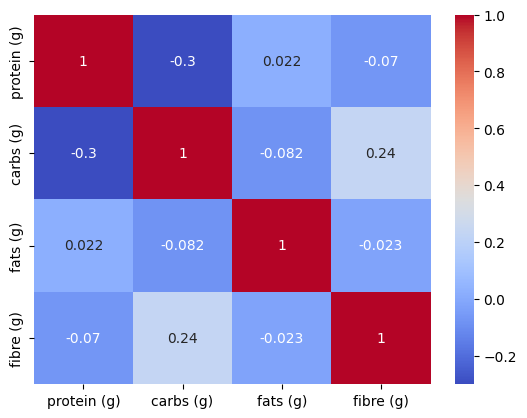

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = target_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

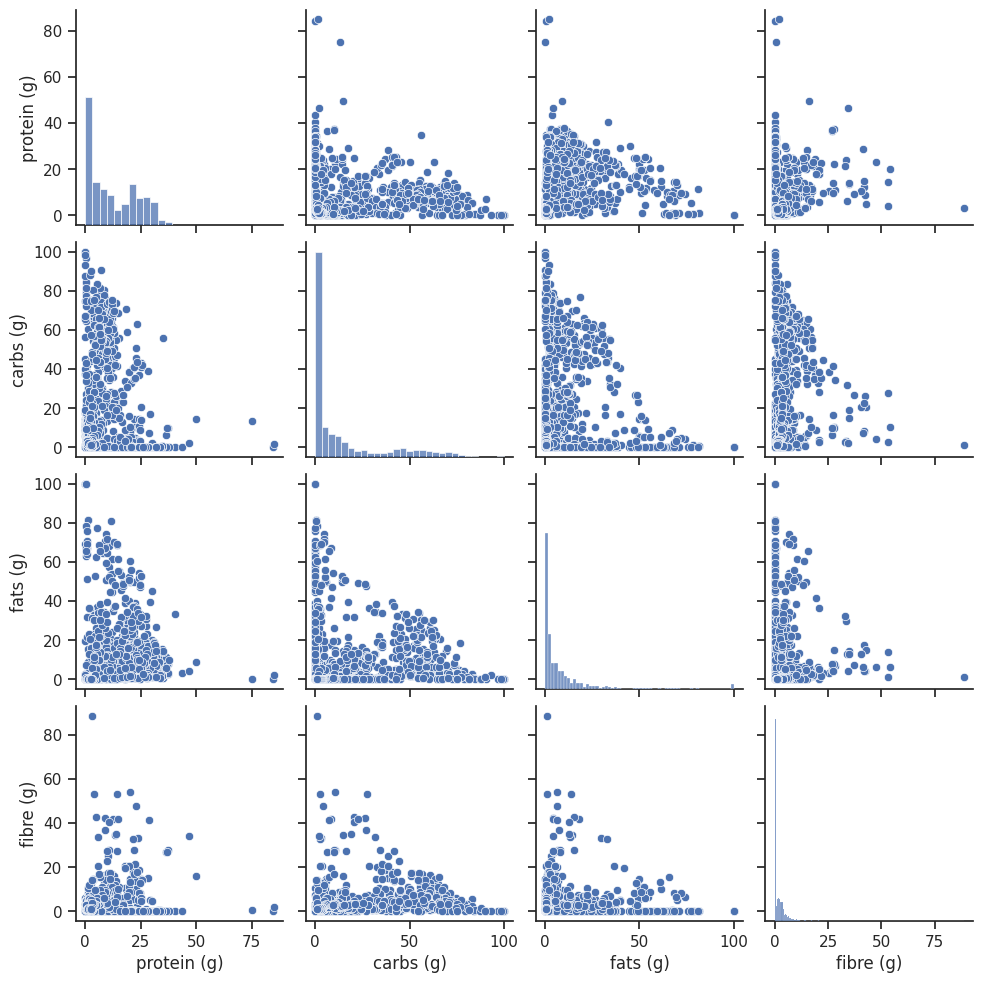

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(target_data)

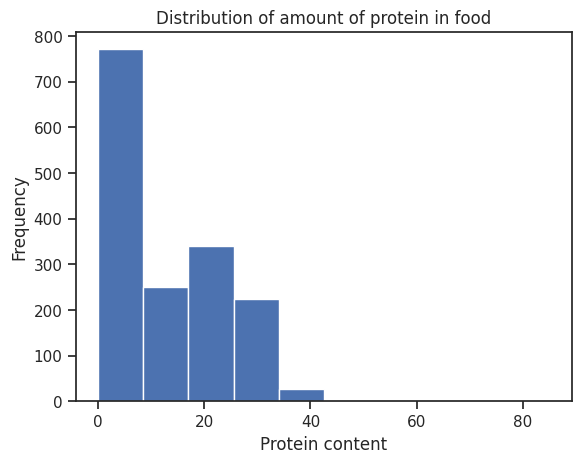

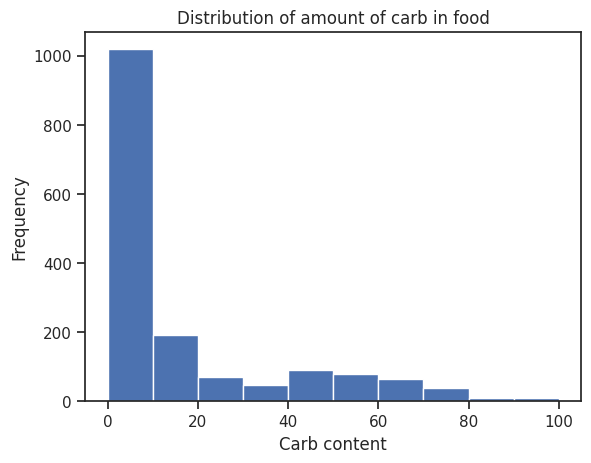

In [ ]:
import matplotlib.pyplot as plt
plt.hist(target_data['protein (g)'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Protein content')
plt.ylabel('Frequency')
plt.title('Distribution of amount of protein in food')
plt.show()

plt.hist(target_data['carbs (g)'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Carb content')
plt.ylabel('Frequency')
plt.title('Distribution of amount of carb in food')
plt.show()


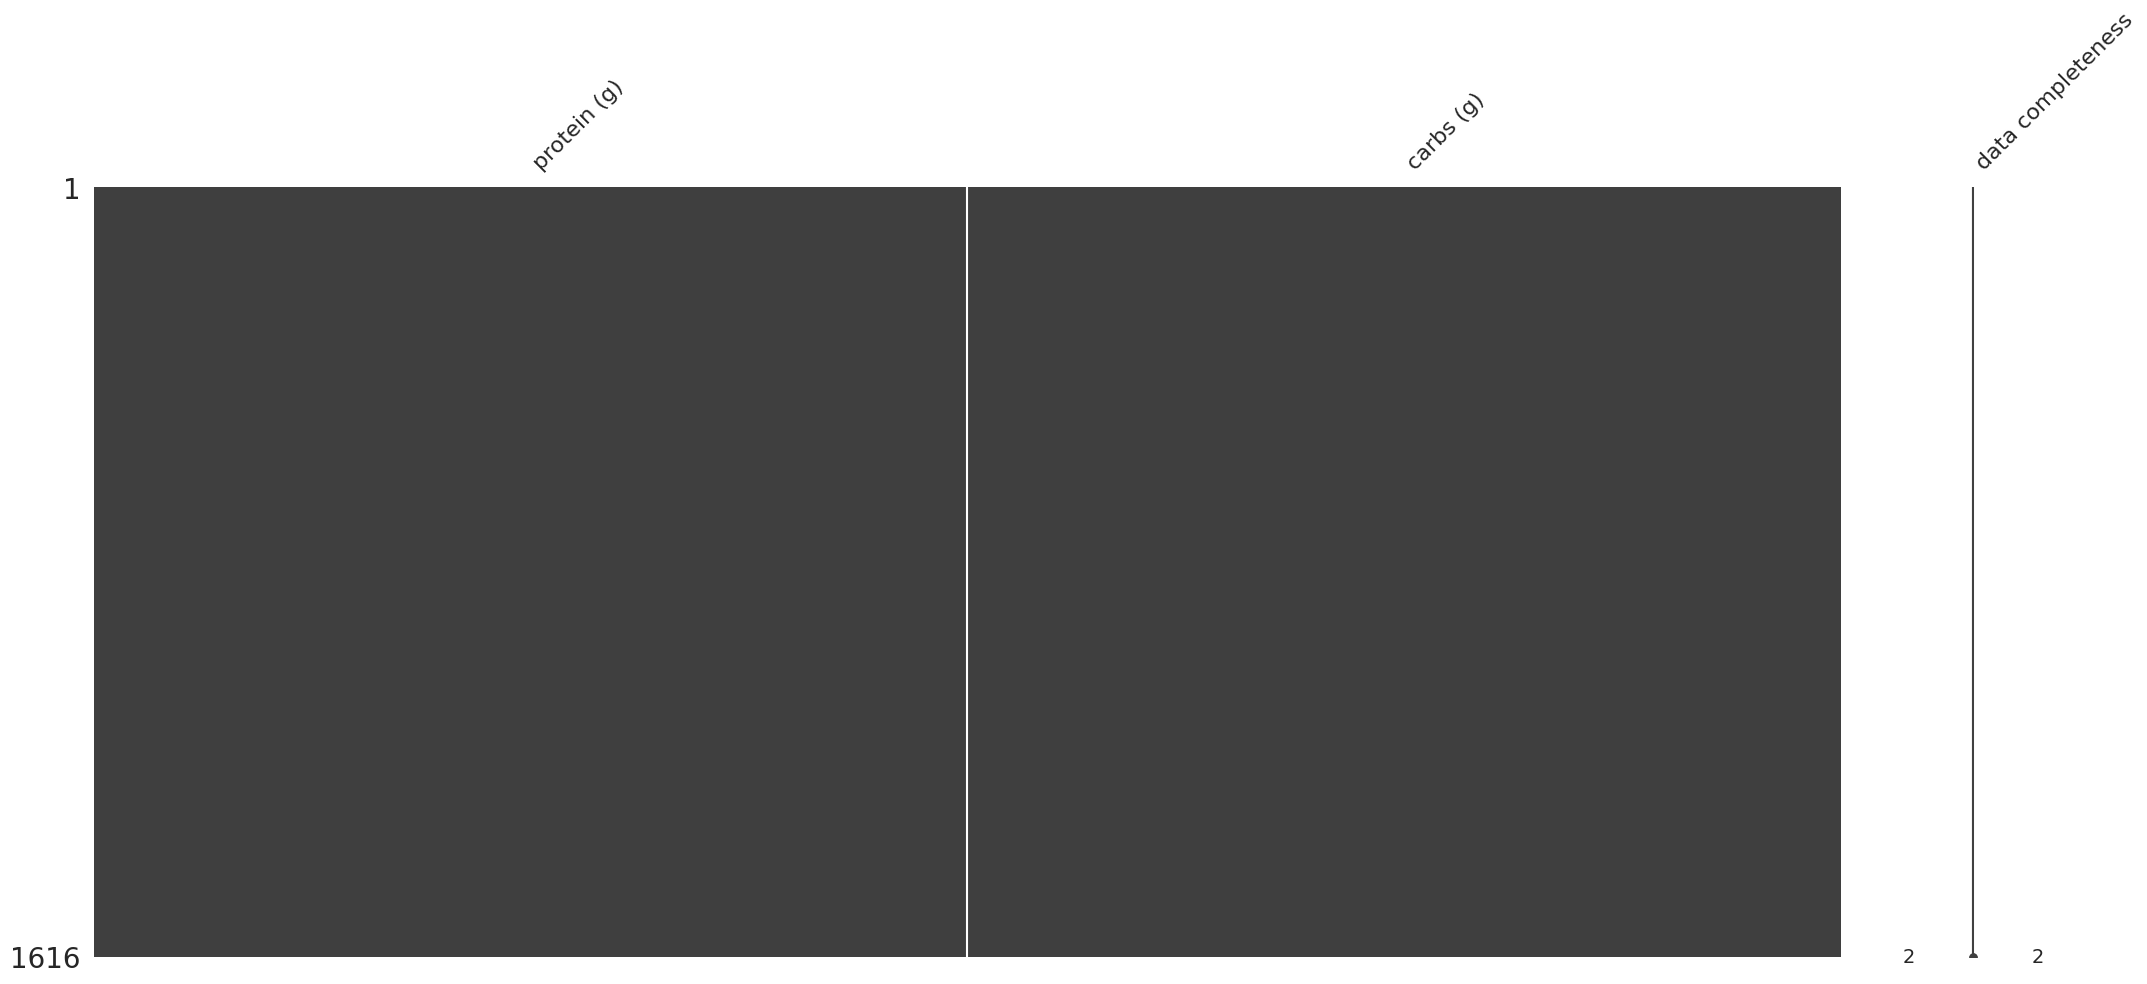

In [ ]:
import missingno as msno
msno.matrix(target_data[['protein (g)', 'carbs (g)']], labels=True, sort="descending");
plt.show()

In [ ]:
p_mean= target_data['protein (g)'].mean()
c_mean= target_data['carbs (g)'].mean()

print(p_mean)
print(c_mean)

12.439232673267329
15.25625


In [ ]:
import numpy as np

# Define the conditions and corresponding values
pro_conditions= [
    target_data['protein (g)'] > p_mean,
    target_data['protein (g)'] < p_mean,
]

carb_conditions=[
    target_data['carbs (g)'] > c_mean,
    target_data['carbs (g)']< c_mean,
]
pro_values= [
    'High Protein',
    'Low Protein',
]

carb_values= [
    'High Carb',
    'Low Carb']
# Create the new column based on the conditions
target_data['Protein content'] = np.select(pro_conditions, pro_values, default='Unknown')
target_data['Carb content'] = np.select(carb_conditions, carb_values, default='Unknown')

#target_data = target_data.drop('Classifier', axis=1)

In [ ]:
class_conditions= [
    (target_data['Protein content'] == 'High Protein') & (target_data['Carb content'] == 'High Carb'),
    (target_data['Protein content'] == 'High Protein') & (target_data['Carb content'] == 'Low Carb'),
    (target_data['Protein content'] == 'Low Protein') & (target_data['Carb content'] == 'High Carb'),
    (target_data['Protein content'] == 'Low Protein') & (target_data['Carb content'] == 'Low Carb')
]

class_values= [
    'HPHC','HPLC','LPHC','LPLC'
]

target_data['classifier'] = np.select(class_conditions, class_values, default='Unknown')
target_data

,Food Name,protein (g),carbs (g),fats (g),fibre (g),Protein content,Carb content,classifier
0,"Cardamom seed, dried, ground",10.8,34.4,6.7,28.0,Low Protein,High Carb,LPHC
1,"Chilli (chili), dried, ground",13.4,14.9,14.3,34.8,High Protein,Low Carb,HPLC
2,"Cinnamon, dried, ground",4.0,27.5,1.2,53.1,Low Protein,High Carb,LPHC
3,"Cloves, dried, ground",6.0,31.6,13.0,33.9,Low Protein,High Carb,LPHC
4,"Coriander seed, dried, ground",12.4,8.4,17.8,41.9,Low Protein,Low Carb,LPLC
...,...,...,...,...,...,...,...,...
1611,"Zucchini, green skin, fresh, unpeeled, fried, ...",1.3,2.4,0.4,1.6,Low Protein,Low Carb,LPLC
1612,"Zucchini, green skin, fresh, unpeeled, boiled,...",1.1,2.0,0.4,1.3,Low Protein,Low Carb,LPLC
1613,"Zucchini, golden, fresh, unpeeled, raw",2.2,1.1,0.3,1.0,Low Protein,Low Carb,LPLC
1614,"Zucchini, golden, fresh, unpeeled, fried, no a...",3.1,1.6,0.4,1.4,Low Protein,Low Carb,LPLC


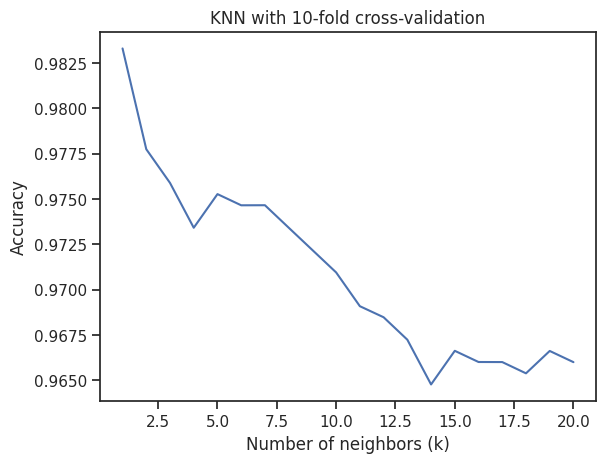

Optimal number of neighbors (k): 1
Highest accuracy: 0.9833103289625029


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate features and target variable
X = target_data[['protein (g)', 'carbs (g)']]
y = target_data['classifier']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

k_values = range(1, 21)  # Range of k values to test
accuracy_scores = []  # List to store accuracy scores

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))

# Plot the accuracy scores for different k values
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN with 10-fold cross-validation')
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print('Optimal number of neighbors (k):', best_k)
print('Highest accuracy:', np.max(accuracy_scores))


In [ ]:
# Create a KNN classifier with k=4
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


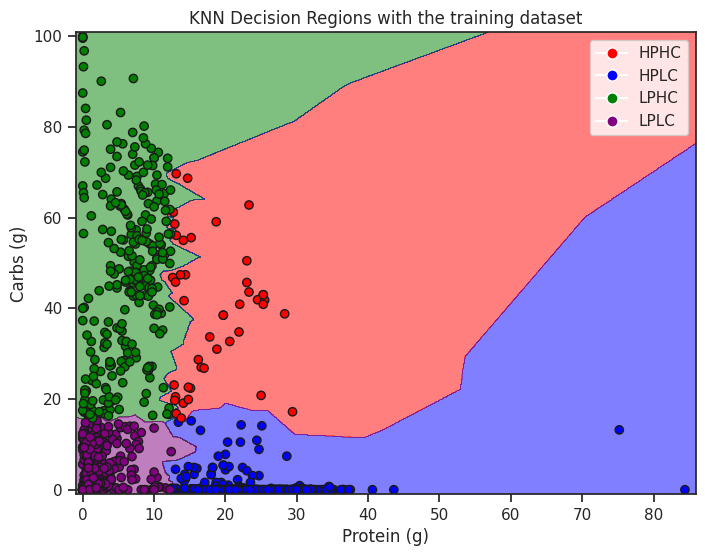

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# Generate a meshgrid of points to plot the decision regions
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = 0.1  # increased step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
Z = label_encoder.fit_transform(Z)

# Reshape the array and convert to float
Z = Z.reshape(xx.shape).astype(float)

# Create a colormap for the classes
cmap = ListedColormap(['red', 'blue', 'green', 'purple'])

# Encode the training labels into numeric values
y_train_encoded = label_encoder.transform(y_train)

# Plot the decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)

# Plot the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_encoded, cmap=cmap, edgecolor='k')
plt.xlabel('Protein (g)')
plt.ylabel('Carbs (g)')
plt.title('KNN Decision Regions with the training dataset')

# Create a legend
class_names = ['HPHC', 'HPLC', 'LPHC', 'LPLC']
class_markers = ['o', 'o', 'o', 'o']
handles = [plt.Line2D([], [], marker=marker, color='w', label=name, markerfacecolor=color, markersize=8)
           for name, color, marker in zip(class_names, cmap.colors, class_markers)]
plt.legend(handles=handles, loc='best')

plt.show()

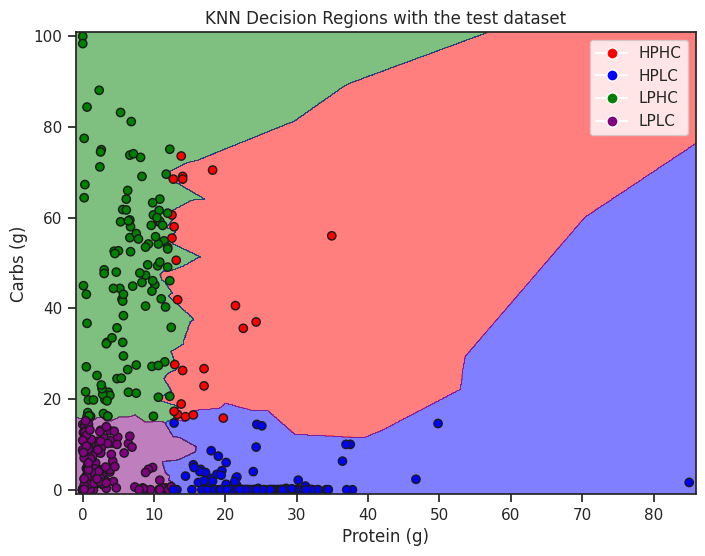

Accuracy: 0.9855670103092784
Precision: 0.9670177888409933
Recall: 0.9436063218390804
F1 score: 0.9543574153552694


In [ ]:
# Encode the training labels into numeric values
y_test_encoded = label_encoder.transform(y_test)

# Plot the decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)

# Plot the training points
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test_encoded, cmap=cmap, edgecolor='k')
plt.xlabel('Protein (g)')
plt.ylabel('Carbs (g)')
plt.title('KNN Decision Regions with the test dataset')

# Create a legend
class_names = ['HPHC', 'HPLC', 'LPHC', 'LPLC']
class_markers = ['o', 'o', 'o', 'o']
handles = [plt.Line2D([], [], marker=marker, color='w', label=name, markerfacecolor=color, markersize=8)
           for name, color, marker in zip(class_names, cmap.colors, class_markers)]
plt.legend(handles=handles, loc='best')

plt.show()

# Evaluate the model's accuracy
#accuracy = knn.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

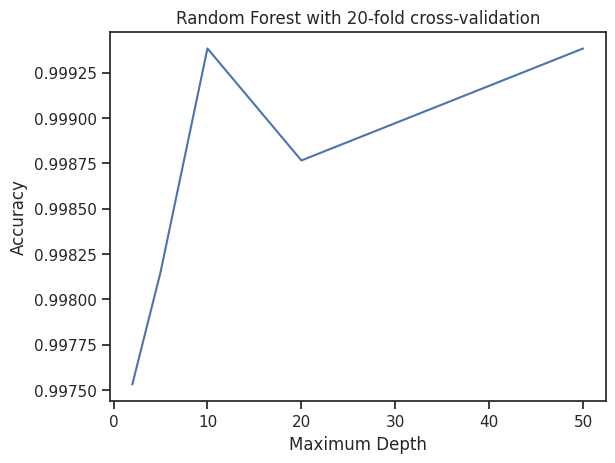

Optimal maximum depth: 10
Highest F1 Score: 0.9993827160493828


In [ ]:
#Random forest
#cross-validation

from sklearn.ensemble import RandomForestClassifier

max_depth_values = [2, 5, 10, 20, 50, None]  # List of max_depth values to test
accuracy_scoresrf = []  # List to store F1 scores

for max_depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=max_depth)
    scores = cross_val_score(rf, X, y, cv=20, scoring='accuracy')
    accuracy_scoresrf.append(np.mean(scores))

# Plot the F1 scores for different max_depth values
plt.plot(max_depth_values, accuracy_scoresrf)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest with 20-fold cross-validation')
plt.show()

best_max_depth = max_depth_values[np.argmax(accuracy_scoresrf)]
print('Optimal maximum depth:', best_max_depth)
print('Highest F1 Score:', np.max(accuracy_scoresrf))


In [ ]:
# Creating and training the random forest classifier
rf_classifier = RandomForestClassifier(max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_predrf = rf_classifier.predict(X_test)


In [ ]:
np.unique(y_train)

array(['HPHC', 'HPLC', 'LPHC', 'LPLC'], dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


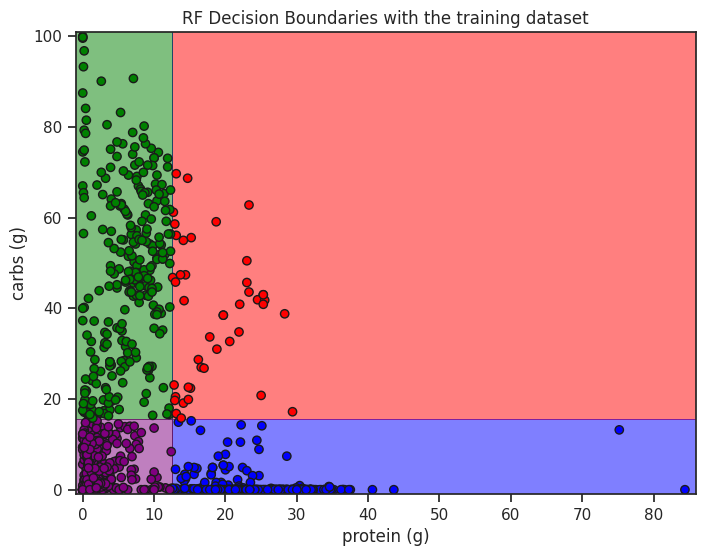

In [ ]:
#RF plot
# Obtain the decision boundary predictions
Zrf = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Encode the string labels into numeric values
Zrf = label_encoder.fit_transform(Zrf)

# Reshape the array and convert to float
Zrf = Zrf.reshape(xx.shape).astype(float)

# Create a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Zrf, alpha=0.5, cmap=cmap)

# Plot the training data points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_encoded, cmap=cmap, edgecolor='k')

# Set plot labels and title
plt.xlabel('protein (g)')
plt.ylabel('carbs (g)')
plt.title('RF Decision Boundaries with the training dataset')

# Show the plot
plt.show()

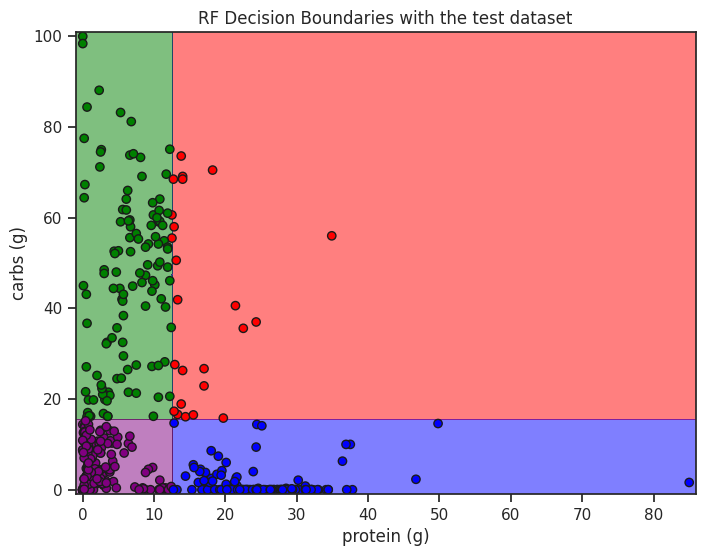

Accuracy: 0.9958762886597938
Precision: 0.9957627118644068
Recall: 0.9791666666666666
F1 Score: 0.9869936826458565


In [ ]:
# Create a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Zrf, alpha=0.5, cmap=cmap)

# Plot the training data points
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test_encoded, cmap=cmap, edgecolor='k')

# Set plot labels and title
plt.xlabel('protein (g)')
plt.ylabel('carbs (g)')
plt.title('RF Decision Boundaries with the test dataset')

# Show the plot
plt.show()

# Calculate accuracy
accuracyrf = accuracy_score(y_test, y_predrf)
print('Accuracy:', accuracyrf)

# Calculate precision
precisionrf = precision_score(y_test, y_predrf, average='macro')
print('Precision:', precisionrf)

# Calculate recall
recallrf = recall_score(y_test, y_predrf, average='macro')
print('Recall:', recallrf)

# Calculate F1 score
f1rf = f1_score(y_test, y_predrf, average='macro')
print('F1 Score:', f1rf)